<a href="https://colab.research.google.com/github/NicoGa1/CAS_ADS/blob/main/Fred_and_Nico_Notebook_CAS_M6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Module 6 - CIFAR10**

The goal of this notebook is to apply the knowledge acquired during the Bern Winter School on Machine Learning of 2023.


The data for the M6 project comes from the dataset CIFRA10 from the keras.io team:
https://keras.io/api/datasets/cifar10/

Each of the 10 classes of this dataset contains exacly 6000 samples(5000 for training and 1000 for test).

In [22]:
# Import the needed libraries

from __future__ import print_function

import os
import sys
import shutil
import tarfile

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%load_ext tensorboard
%matplotlib inline

##from keras.preprocessing.image import ImageDataGenerator
##import seaborn as sns
##
##%matplotlib inline

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [11]:
# Get CIFAR10 data from our source: https://keras.io/api/datasets/cifar10/

cifar10 = tf.keras.datasets.cifar10

# The default batch size of keras is 32,
## and the number of classes for cifar10 is 10.
# This information is important for the next step.

In [12]:
# Setting the parameters for our model

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False # Will be used later

In [13]:
# Time to build the model:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Number of train samples:', x_train.shape[0])
print('Number of test samples:', x_test.shape[0])

print('Our x_train shape:', x_train.shape)
print('Our y_train shape:', y_train.shape)

Number of train samples: 50000
Number of test samples: 10000
Our x_train shape: (50000, 32, 32, 3)
Our y_train shape: (50000, 1)


In [14]:
# Normalize the data by converting it to float.

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices.

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# We define the model of CNN we want.

model = Sequential() # We add layers to the model one by one.

#First stage
## 32 kernels
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:],
                 activation = 'relu'))
## 32 kernels bis
model.add(Conv2D(32, (3, 3), activation = 'relu'))
## Max-pooling operation to reduce computational load
model.add(MaxPooling2D(pool_size=(2, 2)))
## Dropout of random 25% neurons
model.add(Dropout(0.25))

# Second stage
## 64 kernels
model.add(Conv2D(64, (3, 3), padding='same',
                activation = 'relu'))
## 64 kernels bis
model.add(Conv2D(64, (3, 3), activation = 'relu'))
## Max-pooling operation
model.add(MaxPooling2D(pool_size=(2, 2)))
## Dropout of 25%
model.add(Dropout(0.25))

# Final stage
## Converting the image to 1D
## (needed for the accuracy metric and to have compatible metrics)
model.add(Flatten())
## Adding 512 neurons
model.add(Dense(512, activation = 'relu'))
## Dropout of 50%
model.add(Dropout(0.5))
# Adding a softmax classifier (10 classes)
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [16]:
# Optimizer as stochactic gradient descent (SGD)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)

# Loss function
model.compile(optimizer = optimizer,
              loss='mse',
              metrics = 'accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [17]:
# History of the model training

history = None
hist = model.fit(x_train, y_train, 
                 batch_size = batch_size,
                 epochs = epochs,
                 shuffle = True,
                 validation_data = (x_test, y_test), 
                 )

Epoch 1/100
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0902 - accuracy: 0.0974 - val_loss: 0.0900 - val_accuracy: 0.0903
Epoch 2/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0902 - accuracy: 0.0997 - val_loss: 0.0900 - val_accuracy: 0.0901
Epoch 3/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0902 - accuracy: 0.0977 - val_loss: 0.0900 - val_accuracy: 0.0904
Epoch 4/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0902 - accuracy: 0.0962 - val_loss: 0.0900 - val_accuracy: 0.0903
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0902 - accuracy: 0.0948 - val_loss: 0.0900 - val_accuracy: 0.0899
Epoch 6/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0902 - accuracy: 0.0960 - val_loss: 0.0900 - val_accuracy: 0.0899
Epoch 7/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0902 - accuracy: 0.0966 - val_loss: 0.0900 -

In [20]:
# Saving model for inference (to make predictions with other data)

tf.saved_model.save(model, "inference_model/")

mod = tf.saved_model.load('inference_model')
func = mod.signatures["serving_default"]

output_name = model.output_names[0]
print(output_name)

res = func(tf.constant(x_train[:1]))[output_name]
print(res)

activation
tf.Tensor(
[[0.1029216  0.1013895  0.10033531 0.09630375 0.09712157 0.10293134
  0.09895869 0.10163593 0.09864958 0.09975268]], shape=(1, 10), dtype=float32)


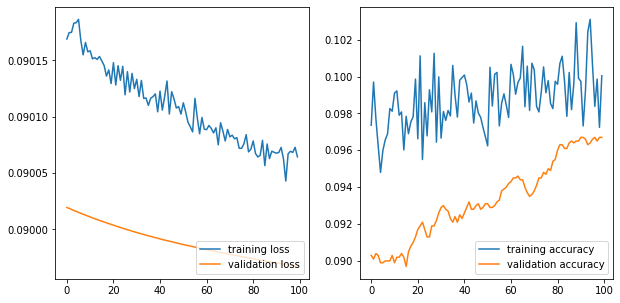

In [21]:
# Training and validation curves for evaluation

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

Confusion matrix, without normalization
[[407   3  97   3   1 483   0   5   0   1]
 [513   7  36   6   5 411   1  16   0   5]
 [476  15  20   3   2 474   0   7   0   3]
 [535   4  17  10   3 422   0   5   0   4]
 [567  15  13   5   2 392   1   2   0   3]
 [439   4  17  14   2 512   3   7   0   2]
 [636   8   6   4   3 334   0   7   0   2]
 [505  14   7   3   2 464   0   4   0   1]
 [361   2  41   2   1 582   0   8   2   1]
 [539   4  37   1   2 405   2   7   0   3]]


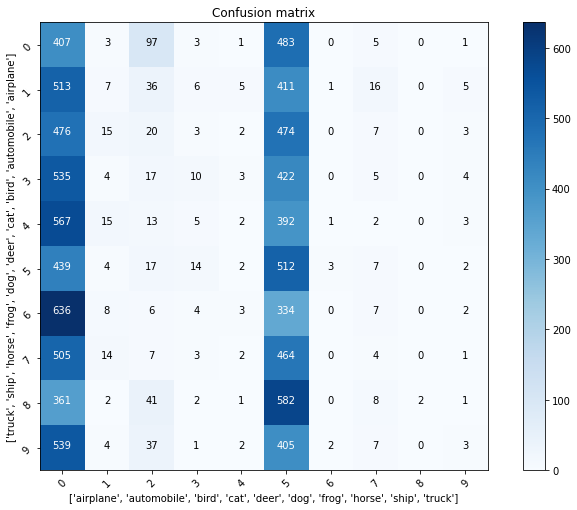

In [43]:
# Confusion matrix

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(model.predict(x_test), axis=1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = model.predict(x_test)[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

plt.rcParams['figure.figsize'] = [10,7]

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes, rotation=45)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel(['truck', 'ship' , 'horse' , 'frog' , 'dog' , 'deer' , 'cat' , 'bird' , 'automobile' , 'airplane'])
  plt.xlabel(labels)
  plt.show()


#p_test = model.predict(x_test).argmax(axis=1)
#p_test = np.argmax(y_pred_classes)
cm = confusion_matrix(y_true, y_pred_classes)
plot_confusion_matrix(cm, list(range(10)))

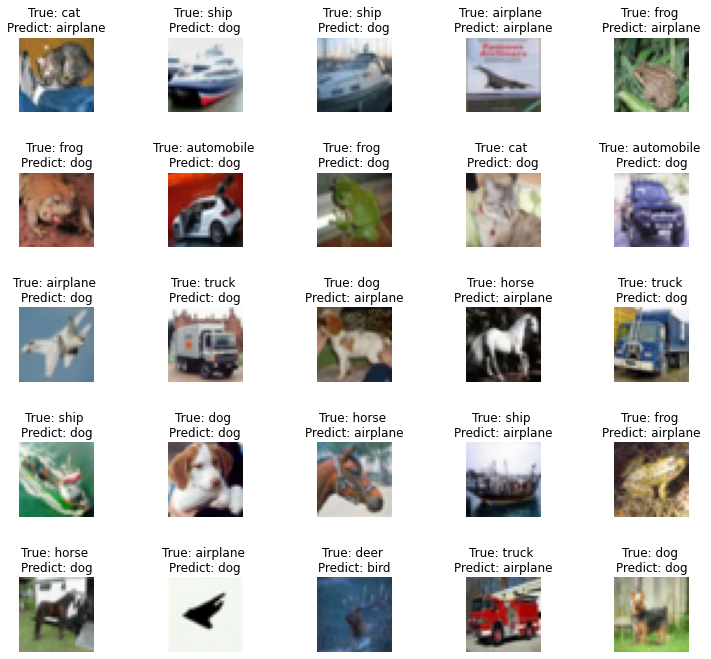

In [44]:
# Check the predictions

R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)